# **Quick Guide for A/B testing**

# Import libraries

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import random
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np

# Create a dummy dataset

In [ ]:
# Set random seed for reproducibility
np.random.seed(42)
random.seed(42)

# Parameters
num_users = 1000  # Total users in test
conversion_rates = {'A': 0.1, 'B': 0.12}  # Assume variant B has a higher conversion rate

# Generate user IDs
user_ids = np.arange(1, num_users + 1)

# Generate variant assignments (randomly assign users to A or B)
variants = np.random.choice(['A', 'B'], size=num_users, p=[0.5, 0.5])

# Generate timestamps (random times within the last 30 days)
start_date = datetime.now() - timedelta(days=30)
timestamps = [start_date + timedelta(days=random.uniform(0, 30)) for _ in range(num_users)]

# Generate conversions based on predefined conversion rates
conversions = [1 if random.random() < conversion_rates[variant] else 0 for variant in variants]

# Create DataFrame
data = pd.DataFrame({
    'user_id': user_ids,
    'timestamp': timestamps,
    'variant': variants,
    'conversion': conversions
})

# Show sample data
print(data.head())

   user_id                  timestamp variant  conversion
0        1 2025-03-22 19:21:11.039686       A           1
1        2 2025-03-04 08:58:24.655620       B           0
2        3 2025-03-11 20:59:12.771296       B           0
3        4 2025-03-10 07:40:39.011365       B           0
4        5 2025-03-25 17:13:30.165196       A           0


# Check for missing values

this is step is necessary when dealing with real data

In [ ]:
# Get dataset info
data.info()

# Check for missing values
print("\nMissing Values:\n", data.isnull().sum())

# Check for duplicates
print("\nDuplicate Rows:", data.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     1000 non-null   int64         
 1   timestamp   1000 non-null   datetime64[ns]
 2   variant     1000 non-null   object        
 3   conversion  1000 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 31.4+ KB

Missing Values:
 user_id       0
timestamp     0
variant       0
conversion    0
dtype: int64

Duplicate Rows: 0


# Check total count and coversion rate

In [ ]:
# Count users per variant
print(data['variant'].value_counts())

# Conversion rates per variant
conversion_rates = data.groupby('variant')['conversion'].mean()
print("\nConversion Rates:\n", conversion_rates)


           user_id                      timestamp   conversion
count  1000.000000                           1000  1000.000000
mean    500.500000  2025-03-18 23:51:18.425810688     0.111000
min       1.000000     2025-03-03 15:06:09.994634     0.000000
25%     250.750000  2025-03-11 12:46:18.608595200     0.000000
50%     500.500000  2025-03-19 09:01:19.789806336     0.000000
75%     750.250000  2025-03-26 07:21:19.569088768     0.000000
max    1000.000000     2025-04-02 14:44:38.890435     1.000000
std     288.819436                            NaN     0.314289
variant
A    503
B    497
Name: count, dtype: int64

Conversion Rates:
 variant
A    0.093439
B    0.128773
Name: conversion, dtype: float64


<ipython-input-17-d49462ad98b0>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=conversion_rates.index, y=conversion_rates.values, palette="Blues")


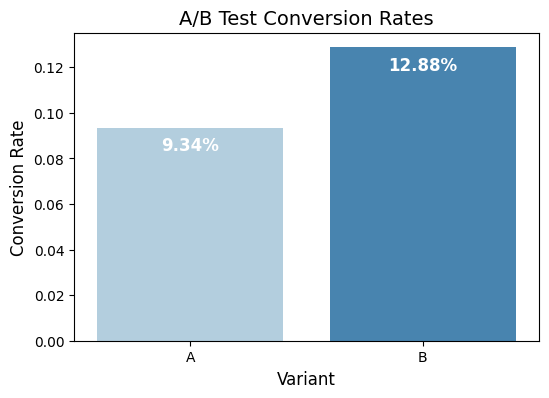

In [ ]:
# Barplot of conversion rates
# Ensure conversion_rates is a Pandas Series
conversion_rates = data.groupby('variant')['conversion'].mean()  # This returns a Series

# Barplot of conversion rates
plt.figure(figsize=(6, 4))
ax = sns.barplot(x=conversion_rates.index, y=conversion_rates.values, palette="Blues")

# Add labels inside the bars
for i, value in enumerate(conversion_rates.values):
    plt.text(i, value - 0.01, f"{value:.2%}", ha="center", fontsize=12, fontweight="bold", color="white")

plt.title("A/B Test Conversion Rates", fontsize=14)
plt.xlabel("Variant", fontsize=12)
plt.ylabel("Conversion Rate", fontsize=12)

plt.show()


# Applying statistical test

In [ ]:
# Get conversion counts per variant
conversions_A = data[data['variant'] == 'A']['conversion'].values # sequence of 0 and 1
conversions_B = data[data['variant'] == 'B']['conversion'].values

# Perform t-test
t_stat, p_value = stats.ttest_ind(conversions_A, conversions_B, equal_var=False) #Welch’s t-test, does NOT assume equal variance (more robust)
print(f"T-test: t-stat={t_stat}, p-value={p_value}")

if p_value < 0.05:
    print("Statistically significant difference!")
else:
    print("No significant difference.")

T-test: t-stat=-1.7779630374254174, p-value=0.07572133345684035
No significant difference.
